In [5]:
!pip install opencv-contrib-python==3.4.5.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
original_img = cv2.imread("010obverse.jpg",-1)
gray_img = cv2.imread("010obverse.jpg",0)

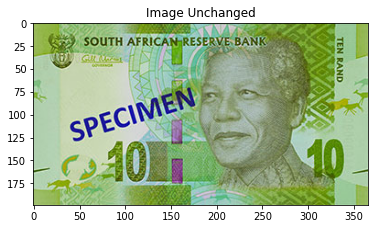

In [3]:
plt.imshow(original_img)
plt.title('Image Unchanged')
plt.show()


FAST

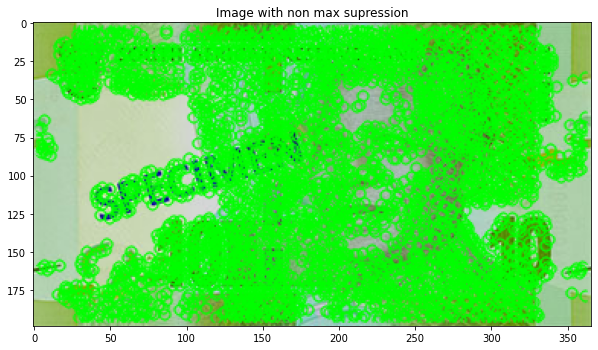

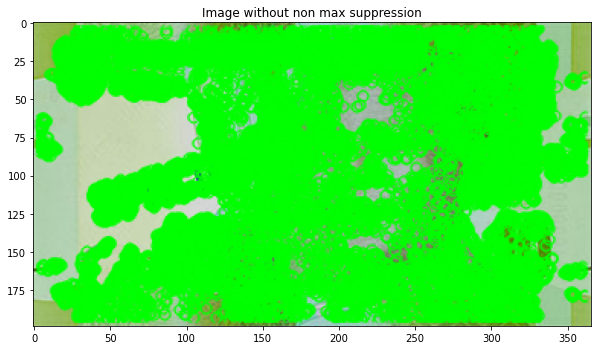

In [24]:
fast = cv2.FastFeatureDetector_create() 
keypoints_with_nonmax = fast.detect(gray_img, None)
fast.setNonmaxSuppression(False)
keypoints_without_nonmax = fast.detect(gray_img, None)
image_with_nonmax = np.copy(original_img)
image_without_nonmax = np.copy(original_img)
cv2.drawKeypoints(original_img, keypoints_with_nonmax, image_with_nonmax, color=(0,255,0),
flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(original_img, keypoints_without_nonmax, image_without_nonmax, color=(0,255,0), 
flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(image_with_nonmax)
plt.title('Image with non max supression')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

plt.imshow(image_without_nonmax)
plt.title('Image without non max suppression')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

ORB

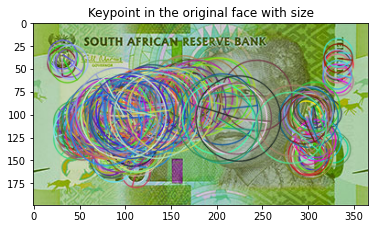

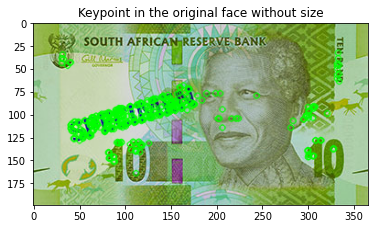

In [13]:
orb = cv2.ORB_create()
original_keypoints, original_descriptor = orb.detectAndCompute(gray_img, None)
query_keypoints, query_descriptor = orb.detectAndCompute(original_img, None)
keypoints_without_size = np.copy(original_img)
keypoints_with_size = np.copy(original_img)

cv2.drawKeypoints(original_img, original_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(original_img, original_keypoints, keypoints_with_size, flags = 
cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(keypoints_with_size)
plt.title('Keypoint in the original face with size')
plt.show()

plt.imshow(keypoints_without_size)
plt.title('Keypoint in the original face without size')
plt.show()



The number of matching keypoints between the original and the query image is 424



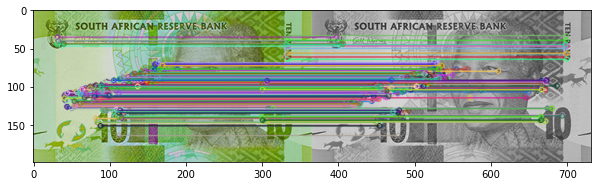

In [25]:
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = brute_force.match(original_descriptor, query_descriptor)
matches = sorted(matches, key = lambda x : x.distance)
result = cv2.drawMatches(original_img, original_keypoints, gray_img, query_keypoints, matches, 
gray_img, flags = 2)
print("The number of matching keypoints between the original and the query image is {}\n".format(len(matches)))

plt.imshow(result)
plt.rcParams["figure.figsize"] = (100,80)
plt.show()